In [1]:
#import for performance check
import timeit
from time import time
start_pynb = timeit.default_timer()

In [2]:
#import important packages
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#generate random data for performance testing
maxnum = 100000
dataGender = np.random.randint(0, 2, size = maxnum)
df0 = pd.DataFrame(dataGender, columns = ['Gender'])
df0['Gender'] = df0['Gender'].map({0:'Male', 1:'Female'})
df0['index1'] = df0.index
df0.insert(0, 'index1', df0.pop('index1'))
df0 = df0.set_index('index1')

dataHeight = np.random.randint(140, 180, size = maxnum)
df1 = pd.DataFrame(dataHeight, columns = ['HeightCm'])
df1['index1'] = df1.index

dataWeight = np.random.randint(50, 100, size = maxnum)
df2 = pd.DataFrame(dataWeight, columns = ['WeightKg'])
df2['index1'] = df2.index

df0 = pd.merge(df0, df1, how = 'left', on = 'index1')
df0 = pd.merge(df0, df2, how = 'left', on = 'index1')
df0

,index1,Gender,HeightCm,WeightKg
0,0,Male,170,73
1,1,Male,142,98
2,2,Male,149,75
3,3,Female,142,81
4,4,Male,171,52
...,...,...,...,...
99995,99995,Male,144,87
99996,99996,Male,147,70
99997,99997,Male,154,89
99998,99998,Male,146,69


In [4]:
df_source = df0.copy()

In [5]:
df_source = df_source.drop('index1', axis = 1)

In [6]:
#save the generated data in csv format
df_source.to_csv("BigSampleDataSource.csv", index=False)

In [7]:
#save the generated data in json format
df_source.to_json("BigSampleDataSource.json", orient = "records")

In [8]:
#display generated data dataframe
df_source

,Gender,HeightCm,WeightKg
0,Male,170,73
1,Male,142,98
2,Male,149,75
3,Female,142,81
4,Male,171,52
...,...,...,...
99995,Male,144,87
99996,Male,147,70
99997,Male,154,89
99998,Male,146,69


In [9]:
#read reference data
df_reference = pd.read_csv("LookupTable.csv")

In [10]:
#Add CatCode as index
df_reference['CatCode'] = df_reference.index
df_reference.insert(0, 'CatCode', df_reference.pop('CatCode'))
df_reference = df_reference.set_index('CatCode')

In [11]:
#display reference dataframe
df_reference

,Category,RangeStart,RangeEnd,Risk
CatCode,,,,
0,Underweight,0.0,18.4,Malnutrition risk
1,Normal weight,18.5,24.9,Low risk
2,Overweight,25.0,29.9,Enhanced risk
3,Moderately obese,30.0,34.9,Medium risk
4,Severely obese,35.0,39.9,High risk
5,Very severely obese,40.0,99.0,Very high risk


In [12]:
#make a copy of source dataframe
df_additional = df_source.copy()

In [13]:
#display dataframe with additional info
df_additional

,Gender,HeightCm,WeightKg
0,Male,170,73
1,Male,142,98
2,Male,149,75
3,Female,142,81
4,Male,171,52
...,...,...,...
99995,Male,144,87
99996,Male,147,70
99997,Male,154,89
99998,Male,146,69


In [14]:
#Convert Height to m**2
df_additional['Heightm2'] = round((df_additional['HeightCm'] / 100) ** 2, 2)

In [15]:
#DerivedValue  = WeightKg / Heightm2
df_additional['DerivedValue'] =  round(df_additional ['WeightKg'] / df_additional['Heightm2'], 2)

In [16]:
#display dataframe with additional info
df_additional

,Gender,HeightCm,WeightKg,Heightm2,DerivedValue
0,Male,170,73,2.89,25.26
1,Male,142,98,2.02,48.51
2,Male,149,75,2.22,33.78
3,Female,142,81,2.02,40.10
4,Male,171,52,2.92,17.81
...,...,...,...,...,...
99995,Male,144,87,2.07,42.03
99996,Male,147,70,2.16,32.41
99997,Male,154,89,2.37,37.55
99998,Male,146,69,2.13,32.39


In [17]:
#set CatCode dataframe with reference data values for which condition is satisfied 
df_additional.loc[(df_additional.DerivedValue < 18.5), 'CatCode'] = 0
df_additional.loc[(df_additional.DerivedValue >= 18.5) & (df_additional.DerivedValue < 25), 'CatCode'] = 1
df_additional.loc[(df_additional.DerivedValue >= 25) & (df_additional.DerivedValue < 30), 'CatCode'] = 2
df_additional.loc[(df_additional.DerivedValue >= 30) & (df_additional.DerivedValue < 35), 'CatCode'] = 3
df_additional.loc[(df_additional.DerivedValue >= 35) & (df_additional.DerivedValue < 40), 'CatCode'] = 4
df_additional.loc[(df_additional.DerivedValue >= 40), 'CatCode'] = 5
df_additional['CatCode'] = df_additional['CatCode'].astype(int)
df_additional

,Gender,HeightCm,WeightKg,Heightm2,DerivedValue,CatCode
0,Male,170,73,2.89,25.26,2
1,Male,142,98,2.02,48.51,5
2,Male,149,75,2.22,33.78,3
3,Female,142,81,2.02,40.10,5
4,Male,171,52,2.92,17.81,0
...,...,...,...,...,...,...
99995,Male,144,87,2.07,42.03,5
99996,Male,147,70,2.16,32.41,3
99997,Male,154,89,2.37,37.55,4
99998,Male,146,69,2.13,32.39,3


In [18]:
#merge the dataframe with additional info and reference dataframe
df_additional = pd.merge(df_additional, df_reference, how = 'left', on = 'CatCode')

In [19]:
#display dataframe with additional info
df_additional

,Gender,HeightCm,WeightKg,Heightm2,DerivedValue,CatCode,Category,RangeStart,RangeEnd,Risk
0,Male,170,73,2.89,25.26,2,Overweight,25.0,29.9,Enhanced risk
1,Male,142,98,2.02,48.51,5,Very severely obese,40.0,99.0,Very high risk
2,Male,149,75,2.22,33.78,3,Moderately obese,30.0,34.9,Medium risk
3,Female,142,81,2.02,40.10,5,Very severely obese,40.0,99.0,Very high risk
4,Male,171,52,2.92,17.81,0,Underweight,0.0,18.4,Malnutrition risk
...,...,...,...,...,...,...,...,...,...,...
99995,Male,144,87,2.07,42.03,5,Very severely obese,40.0,99.0,Very high risk
99996,Male,147,70,2.16,32.41,3,Moderately obese,30.0,34.9,Medium risk
99997,Male,154,89,2.37,37.55,4,Severely obese,35.0,39.9,High risk
99998,Male,146,69,2.13,32.39,3,Moderately obese,30.0,34.9,Medium risk


In [20]:
#save dataframe with additional info in csv format
df_additional.to_csv("BigSampleDataAdditional.csv", index=False)

In [21]:
#save dataframe with additional info in json format
df_additional.to_json("BigSampleDataAdditional.json", orient = "records")

In [22]:
#stop timer for performance check
stop_pynb = timeit.default_timer()
print('Time taken for data: {} seconds'.format(round(stop_pynb - start_pynb,2))) 
start_pynb = timeit.default_timer()

Time taken for data: 3.85 seconds


In [23]:
#stats
df_additional.describe().round(2)

,HeightCm,WeightKg,Heightm2,DerivedValue,CatCode,RangeStart,RangeEnd
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,159.46,74.53,2.56,29.78,2.48,26.43,37.70
std,11.53,14.39,0.37,7.24,1.36,8.64,21.29
min,140.00,50.00,1.96,15.62,0.00,0.00,18.40
25%,149.00,62.00,2.22,24.28,1.00,18.50,24.90
50%,159.00,75.00,2.53,29.11,2.00,25.00,29.90
75%,169.00,87.00,2.86,34.65,3.00,30.00,34.90
max,179.00,99.00,3.20,50.51,5.00,40.00,99.00


<AxesSubplot:>

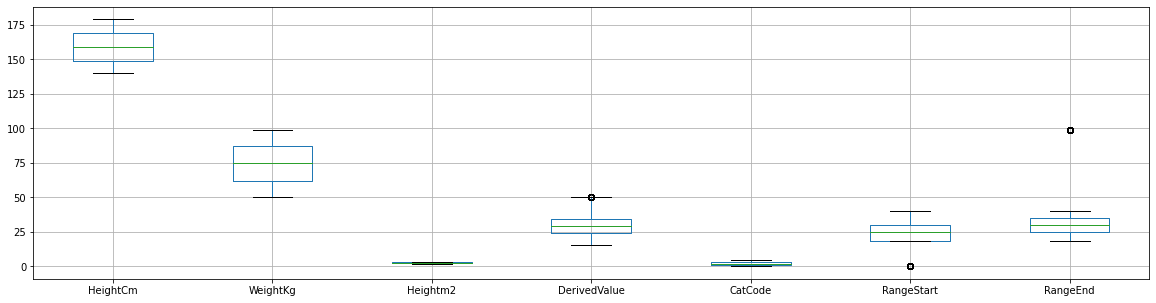

In [24]:
#boxplots for depiction
df_additional.boxplot(figsize = (20, 5))

In [25]:
#value_counts
df_additional.value_counts()

Gender  HeightCm  WeightKg  Heightm2  DerivedValue  CatCode  Category             RangeStart  RangeEnd  Risk          
Female  156       97        2.43      39.92         4        Severely obese       35.0        39.9      High risk         44
Male    146       80        2.13      37.56         4        Severely obese       35.0        39.9      High risk         43
Female  154       62        2.37      26.16         2        Overweight           25.0        29.9      Enhanced risk     43
Male    148       72        2.19      32.88         3        Moderately obese     30.0        34.9      Medium risk       42
        159       89        2.53      35.18         4        Severely obese       35.0        39.9      High risk         42
                                                                                                                          ..
        143       71        2.04      34.80         3        Moderately obese     30.0        34.9      Medium risk       13
      

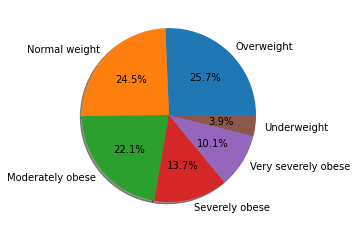

In [26]:
Category = list(df_additional['Category'].value_counts().index)
CategoryCount = list(df_additional['Category'].value_counts().values)

fig1, ax1 = plt.subplots()
ax1.pie(CategoryCount, labels=Category, autopct='%1.1f%%', shadow=True)

plt.show()

In [27]:
#stop timer for performance check
stop_pynb = timeit.default_timer()
print('Time taken for graph: {} seconds'.format(round(stop_pynb - start_pynb,2))) 

Time taken for graph: 2.25 seconds
